In [2]:
import numpy as np
import pandas as pd
import mesa
import seaborn as sns

In [3]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        super().__init__(model)

        self.wealth = 1

    def exchange(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        self.agents.shuffle_do("exchange")

In [4]:
model = MoneyModel(10)
model.step()
print(f"You have {len(model.agents)} agents.")

You have 10 agents.


In [43]:
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid

class MoneyAgent(CellAgent):
    
    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell  
        self.wealth = 1

    def move(self):
        neighbors = self.cell.neighborhood.cells
        
        available_cells = [c for c in neighbors if not c.is_full]
        
        
        if available_cells:
            new_cell = self.random.choice(available_cells)
            self.cell = new_cell
    
    def give_money(self):
        cellmates = [
            a for a in self.cell.agents if a is not self
        ]

        if self.wealth > 0 and cellmates:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid((width, height), torus=True, random=self.random, capacity=3)

        available_slots = []
        for cell in self.grid.all_cells.cells:
            for _ in range(self.grid.capacity):
                available_slots.append(cell)
            
        initial_cells = self.random.sample(available_slots, k=self.num_agents)
        
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            initial_cells,
        )

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [44]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()

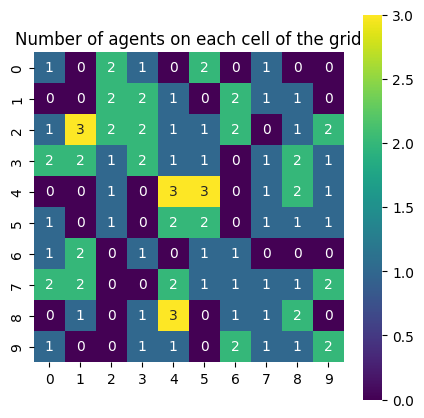

In [45]:
agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell in model.grid.all_cells:
    agent_counts[cell.coordinate] = len(cell.agents)

g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=True, square=True)
g.figure.set_size_inches(5,5)
g.set(title="Number of agents on each cell of the grid");

In [49]:
from mesa.discrete_space import CellAgent, OrthogonalVonNeumannGrid

class MoneyAgent(CellAgent):
    
    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell  
        self.wealth = 1

    def move(self):
        neighbors = self.cell.neighborhood.cells
        
        available_cells = [c for c in neighbors if not c.is_full]
        
        
        if available_cells:
            new_cell = self.random.choice(available_cells)
            self.cell = new_cell
    
    def give_money(self):
        cellmates = [
            a for a in self.cell.agents if a is not self
        ]

        if self.wealth > 0 and cellmates:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalVonNeumannGrid((width, height), torus=True, random=self.random, capacity=3)

        available_slots = []
        for cell in self.grid.all_cells.cells:
            for _ in range(self.grid.capacity):
                available_slots.append(cell)
            
        initial_cells = self.random.sample(available_slots, k=self.num_agents)
        
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            initial_cells,
        )

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [50]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()

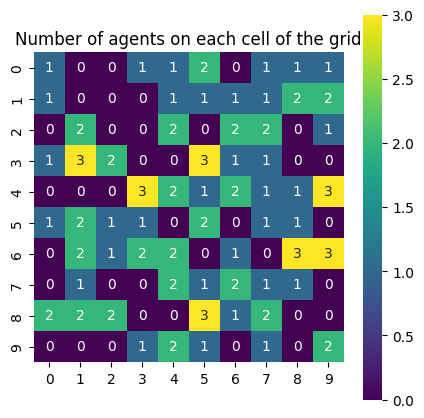

In [51]:
agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell in model.grid.all_cells:
    agent_counts[cell.coordinate] = len(cell.agents)

g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=True, square=True)
g.figure.set_size_inches(5,5)
g.set(title="Number of agents on each cell of the grid");